In [1]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import xarray as xr
import requests
import regionmask
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

In [2]:
# Generate names from regions to study
names = []
for i in range(0, 22):
  names.append('GT-')
  if (i < 9):
    names[i] += '0' + str(i + 1)
  else:
    names[i] += str(i + 1)

In [3]:
place = ox.geocode_to_gdf('GT-01')
places = ox.geocode_to_gdf(names)
#places = places.to_crs({'init': 'epsg:3857'})
places

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-90.75957 14.73598, -90.75933 14.731...",14.915136,14.240037,-90.210978,-90.759568,298051326,relation,214704,14.642470,-90.513135,"Guatemala Department, Guatemala",boundary,administrative,0.452553
1,"POLYGON ((-90.40518 14.86291, -90.40515 14.862...",15.152790,14.667343,-89.792982,-90.405179,299455903,relation,214697,14.910044,-90.068273,"El Progreso, Guatemala",boundary,administrative,0.419111
2,"POLYGON ((-90.88092 14.47462, -90.85277 14.449...",14.721912,14.383430,-90.609194,-90.880917,298054696,relation,214703,14.553176,-90.754702,"Sacatepéquez, Guatemala",boundary,administrative,0.423610
3,"POLYGON ((-91.12867 14.46008, -91.12526 14.459...",14.938498,14.369445,-90.619370,-91.128666,298050588,relation,214715,14.653975,-90.927274,"Chimaltenango, Guatemala",boundary,administrative,0.427802
4,"POLYGON ((-91.53566 14.04448, -91.53450 14.043...",14.474620,13.909643,-90.581370,-91.535655,298051954,relation,214714,14.192074,-91.027995,"Escuintla, Guatemala",boundary,administrative,0.433383
5,"POLYGON ((-90.67398 14.01905, -90.66031 13.932...",14.505147,13.795392,-90.046921,-90.673979,299327260,relation,9565597,14.150152,-90.350882,"Santa Rosa, Guatemala",boundary,administrative,0.421994
6,"POLYGON ((-91.50665 14.60152, -91.49528 14.597...",14.893421,14.514365,-91.068589,-91.506646,298051293,relation,214713,14.703941,-91.282818,"Sololá, Guatemala",boundary,administrative,0.426477
7,"POLYGON ((-91.55578 14.93857, -91.55524 14.938...",15.253473,14.823481,-91.175316,-91.555783,298079309,relation,214709,15.042344,-91.406146,"Totonicapán, Guatemala",boundary,administrative,0.408908
8,"POLYGON ((-92.13850 14.62100, -92.13844 14.620...",15.225884,14.492971,-91.403299,-92.138498,298109544,relation,214710,14.859464,-91.593159,"Quetzaltenango, Guatemala",boundary,administrative,0.445413
9,"POLYGON ((-91.67029 14.12416, -91.66924 14.123...",14.705294,14.044479,-91.093311,-91.670288,298058364,relation,214696,14.374900,-91.364955,"Suchitepéquez, Guatemala",boundary,administrative,0.427623


In [6]:
places[['name', 'country_name']] = places.display_name.str.split(', ', expand=True)
places

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,name,country_name
0,"POLYGON ((-90.75957 14.73598, -90.75933 14.731...",14.915136,14.240037,-90.210978,-90.759568,298051326,relation,214704,14.642470,-90.513135,"Guatemala Department, Guatemala",boundary,administrative,0.452553,Guatemala Department,Guatemala
1,"POLYGON ((-90.40518 14.86291, -90.40515 14.862...",15.152790,14.667343,-89.792982,-90.405179,299455903,relation,214697,14.910044,-90.068273,"El Progreso, Guatemala",boundary,administrative,0.419111,El Progreso,Guatemala
2,"POLYGON ((-90.88092 14.47462, -90.85277 14.449...",14.721912,14.383430,-90.609194,-90.880917,298054696,relation,214703,14.553176,-90.754702,"Sacatepéquez, Guatemala",boundary,administrative,0.423610,Sacatepéquez,Guatemala
3,"POLYGON ((-91.12867 14.46008, -91.12526 14.459...",14.938498,14.369445,-90.619370,-91.128666,298050588,relation,214715,14.653975,-90.927274,"Chimaltenango, Guatemala",boundary,administrative,0.427802,Chimaltenango,Guatemala
4,"POLYGON ((-91.53566 14.04448, -91.53450 14.043...",14.474620,13.909643,-90.581370,-91.535655,298051954,relation,214714,14.192074,-91.027995,"Escuintla, Guatemala",boundary,administrative,0.433383,Escuintla,Guatemala
5,"POLYGON ((-90.67398 14.01905, -90.66031 13.932...",14.505147,13.795392,-90.046921,-90.673979,299327260,relation,9565597,14.150152,-90.350882,"Santa Rosa, Guatemala",boundary,administrative,0.421994,Santa Rosa,Guatemala
6,"POLYGON ((-91.50665 14.60152, -91.49528 14.597...",14.893421,14.514365,-91.068589,-91.506646,298051293,relation,214713,14.703941,-91.282818,"Sololá, Guatemala",boundary,administrative,0.426477,Sololá,Guatemala
7,"POLYGON ((-91.55578 14.93857, -91.55524 14.938...",15.253473,14.823481,-91.175316,-91.555783,298079309,relation,214709,15.042344,-91.406146,"Totonicapán, Guatemala",boundary,administrative,0.408908,Totonicapán,Guatemala
8,"POLYGON ((-92.13850 14.62100, -92.13844 14.620...",15.225884,14.492971,-91.403299,-92.138498,298109544,relation,214710,14.859464,-91.593159,"Quetzaltenango, Guatemala",boundary,administrative,0.445413,Quetzaltenango,Guatemala
9,"POLYGON ((-91.67029 14.12416, -91.66924 14.123...",14.705294,14.044479,-91.093311,-91.670288,298058364,relation,214696,14.374900,-91.364955,"Suchitepéquez, Guatemala",boundary,administrative,0.427623,Suchitepéquez,Guatemala


<Axes: >

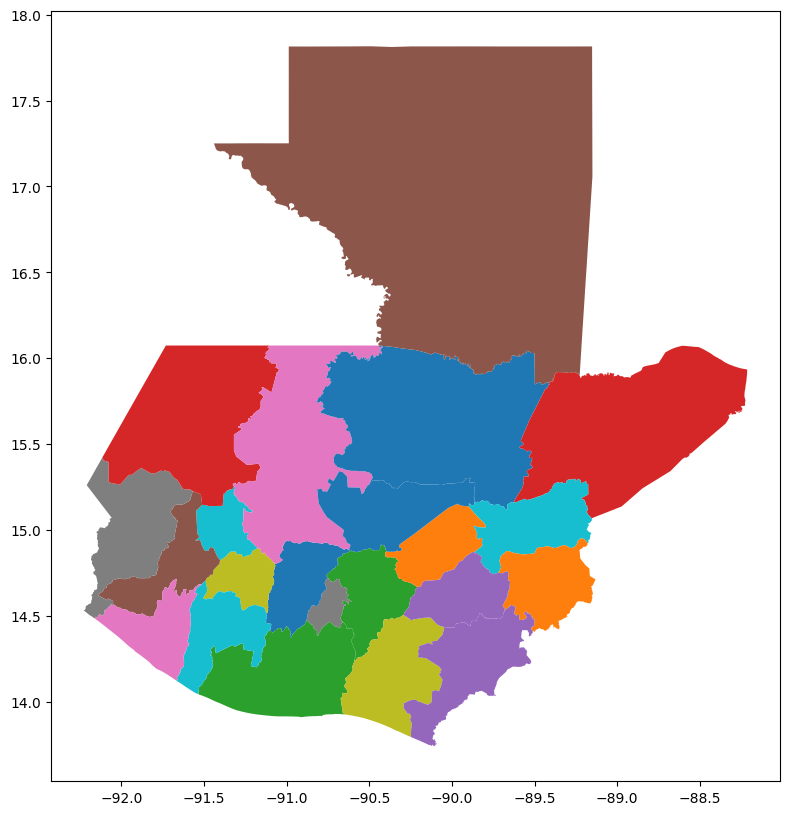

In [7]:
fig, ax = plt.subplots(figsize = (16,10))
places.plot(ax = ax, column = 'name')

In [8]:
my_list = list(places['name'])
my_list_unique = set(list(places['name']))
indexes = [my_list.index(x) for x in my_list_unique]

In [36]:
places_mask_poly = regionmask.from_geopandas(places, name = 'Guatemala', names = places['name'])
places_mask_poly

<regionmask.Regions 'Guatemala'>
overlap:  False

Regions:
 0  r0 Guatemala Department
 1  r1          El Progreso
 2  r2         Sacatepéquez
 3  r3        Chimaltenango
 4  r4            Escuintla
..  ..                  ...
17 r17               Izabal
18 r18               Zacapa
19 r19           Chiquimula
20 r20               Jalapa
21 r21              Jutiapa

[22 regions]

In [54]:
ds = xr.open_dataset("../Desktop/POWER_Point_Hourly_20210101_20211231_014d65N_089d94W_LST.nc")
ds

<xarray.Dataset>
Dimensions:         (time: 8760, lat: 1, lon: 1)
Coordinates:
  * time            (time) datetime64[ns] 2020-12-31T18:00:00 ... 2021-12-31T...
  * lat             (lat) float32 14.65
  * lon             (lon) float32 -89.94
Data variables:
    ALLSKY_SRF_ALB  (time, lat, lon) float32 ...
    ALLSKY_SFC_UVB  (time, lat, lon) float32 ...
    ALLSKY_SFC_UVA  (time, lat, lon) float32 ...
    PS              (time, lat, lon) float32 ...
    PRECTOTCORR     (time, lat, lon) float32 ...
    T2MDEW          (time, lat, lon) float32 ...
    T2M             (time, lat, lon) float32 ...
    WS10M           (time, lat, lon) float32 ...
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2021-06-16T10:30:00.000000
    ...                         ...
    time_coverage_end:          2024-12-31T23:00:00
    time_coverage_resolution:   P1H
    time_coverage_start:        2000-12-31T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Hourly Radiation Time Series
    version:                    POWER Version 9.0.1

In [11]:
fig = plt.figure(figsize = (16, 0))
#fig, ax = plt.subplots(figsize = (11.69, 8.27))

map = Basemap(projection = 'mill',
             llcrnrlat = 13,
             urcrnrlat = 18,
             llcrnrlon = -92.5,
             urcrnrlon = -88,
             resolution = 'i')

<Figure size 1600x0 with 0 Axes>

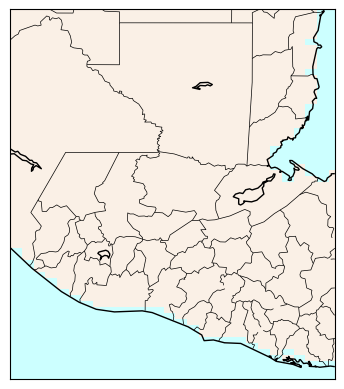

In [12]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)
plt.show()

In [31]:
#mask = places_mask_poly.mask(ds)
mask = places_mask_poly.mask(ds.isel(time = 0), lat_name = 'lat', lon_name = 'lon')
mask

AttributeError: '_OneRegion' object has no attribute 'mask'

In [28]:
# Masking the data based on the masked created using shapefile
masked_shape = ds.where(mask == 0)
masked_shape

<xarray.Dataset>
Dimensions:      (time: 366, lat: 10, lon: 8)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2023-01-01
  * lat          (lat) float32 13.25 13.75 14.25 14.75 ... 16.75 17.25 17.75
  * lon          (lon) float32 -91.75 -91.25 -90.75 ... -89.25 -88.75 -88.25
Data variables:
    T2M_RANGE    (time, lat, lon) float32 0.61 0.85 1.14 1.88 ... 7.47 7.41 3.81
    T2MDEW       (time, lat, lon) float32 22.17 22.41 22.46 ... 21.81 22.45
    T2M_MAX      (time, lat, lon) float32 27.94 28.06 28.25 ... 29.18 29.53 28.4
    QV2M         (time, lat, lon) float32 16.6 16.85 16.92 ... 15.97 16.24 16.8
    WS10M_MAX    (time, lat, lon) float32 4.02 4.2 4.04 3.88 ... 1.63 2.01 3.79
    PS           (time, lat, lon) float32 101.1 101.1 101.1 ... 100.9 101.4
    PRECTOTCORR  (time, lat, lon) float32 0.3 0.55 0.68 1.27 ... 0.89 0.61 0.65
    T2M          (time, lat, lon) float32 27.58 27.56 27.55 ... 25.11 26.14
    WS10M        (time, lat, lon) float32 2.94 2.8 2.59 2.34 ... 1.17 1.36 3.19
    WS10M_MIN    (time, lat, lon) float32 1.78 1.22 0.83 0.66 ... 0.82 0.91 2.67
    T2M_MIN      (time, lat, lon) float32 27.32 27.21 27.11 ... 22.11 24.59
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2021-06-16T10:30:00.000000
    ...                         ...
    time_coverage_end:          2024-12-31T00:00:00
    time_coverage_resolution:   P1D
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Local Solar Time (LST)
    title:                      POWER Daily Meteorologging_Functiony Time Series
    version:                    POWER Version 9.0.1

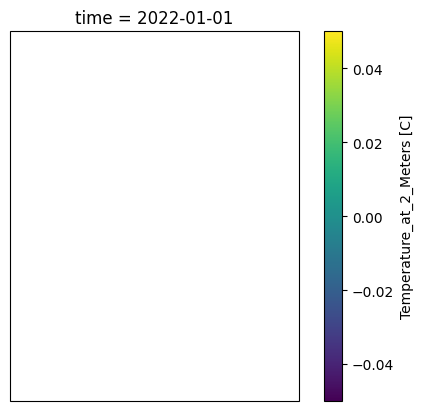

In [27]:
# Plotting the masked data
proj = ccrs.Miller(central_longitude = -100)
ax = plt.subplot(111, projection = proj)
masked_shape.isel(time = 0).T2M.plot(ax = ax, transform = ccrs.PlateCarree())

In [14]:
t2 = ds.variables['T2M']
times = ds.variables['time'][:] # Extracting all time values
# Storing the lat and lon data into the variables
lat = ds.variables['lat'][:] # Extracting all the latitudes
lon = ds.variables['lon'][:] # Extracting all the longitudes

In [15]:
fig = plt.figure(figsize = (16, 0))
#fig, ax = plt.subplots(figsize = (11.69, 8.27))

map = Basemap(projection = 'mill',
             llcrnrlat = -50,
             urcrnrlat = 50,
             llcrnrlon = -180,
             urcrnrlon = 180,
             resolution = 'c')

<Figure size 1600x0 with 0 Axes>

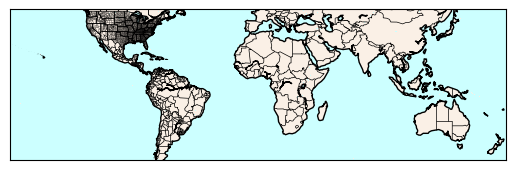

In [16]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)
plt.show()

In [17]:
import numpy as np
lons, lats = np.meshgrid(lon, lat) # for this dataset, longitude is -180 through 180,
# so you don't need to subtract 180 to properly display on map
x, y = map(lons, lats)

Text(0.5, 1.0, 'Temperature at 2 meters')

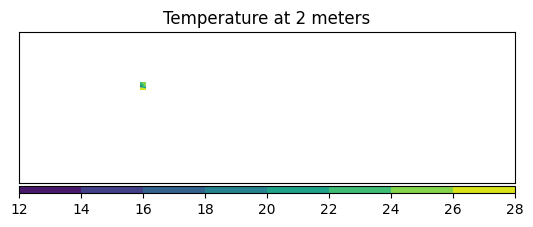

In [18]:
temp2m = map.contourf(x,y,t2[5,:,:]) # 0 for Jan, and 11 for December
#precip = map.contourf(x,y,tp[:])
cb = map.colorbar(temp2m, "bottom", size = "5%", pad = "2%")
plt.title('Temperature at 2 meters')
#cb.set_label('Rainfall ({})'.format(unitp))

In [19]:
fig = plt.figure(figsize = (16, 0))
#fig, ax = plt.subplots(figsize = (11.69, 8.27))

map = Basemap(projection = 'mill',
             llcrnrlat = 13,
             urcrnrlat = 18,
             llcrnrlon = -92.5,
             urcrnrlon = -88,
             resolution = 'i')

<Figure size 1600x0 with 0 Axes>

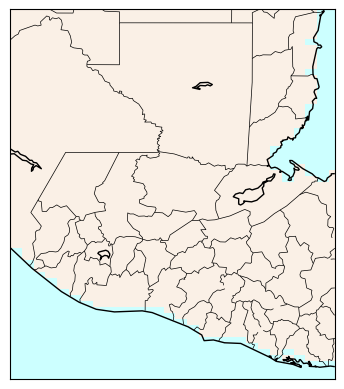

In [20]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)
plt.show()

In [21]:
import numpy as np
lons, lats = np.meshgrid(lon, lat) # for this dataset, longitude is -180 through 180,
# so you don't need to subtract 180 to properly display on map
x, y = map(lons, lats)

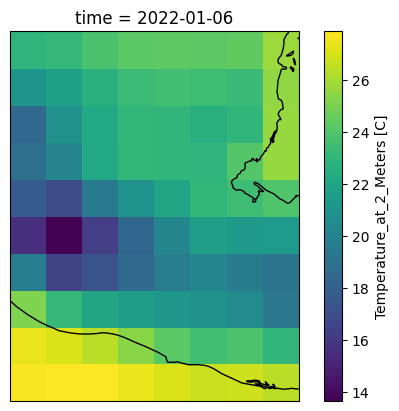

In [37]:
proj = ccrs.Miller(central_longitude = -100)
ax = plt.subplot(111, projection = proj)
ds.isel(time = 5).T2M.plot(ax = ax, transform = ccrs.PlateCarree())
ax.coastlines();

<GeoAxes: >

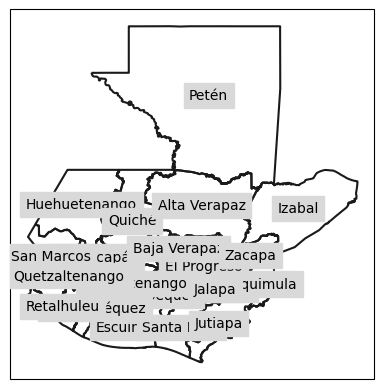

In [23]:
places_mask_poly.plot(label="name", add_coastlines=False)
#ax.set_extent([13, 18, -92.5, -88], crs = ccrs.PlateCarree())

# Extracción de datos climáticos con CSV

In [75]:
# Required modules
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [55]:
# Generate names from regions to study
names = []
for i in range(0, 22):
  names.append('GT-')
  if (i < 9):
    names[i] += '0' + str(i + 1)
  else:
    names[i] += str(i + 1)

In [66]:
places = ox.geocode_to_gdf(names)
places[['name', 'country_name']] = places.display_name.str.split(', ', expand=True)
places['name'][0] = places['name'][0].split(" ")[0]
places['name'] = places['name'].str.upper()
# Remove accents to the regions names
places['name'] = places['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
places

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19572\3360005276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places['name'][0] = places['name'][0].split(" ")[0]


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,name,country_name
0,"POLYGON ((-90.75957 14.73598, -90.75933 14.731...",14.915136,14.240037,-90.210978,-90.759568,298051326,relation,214704,14.642470,-90.513135,"Guatemala Department, Guatemala",boundary,administrative,0.452553,GUATEMALA,Guatemala
1,"POLYGON ((-90.40518 14.86291, -90.40515 14.862...",15.152790,14.667343,-89.792982,-90.405179,299455903,relation,214697,14.910044,-90.068273,"El Progreso, Guatemala",boundary,administrative,0.419111,EL PROGRESO,Guatemala
2,"POLYGON ((-90.88092 14.47462, -90.85277 14.449...",14.721912,14.383430,-90.609194,-90.880917,298054696,relation,214703,14.553176,-90.754702,"Sacatepéquez, Guatemala",boundary,administrative,0.423610,SACATEPEQUEZ,Guatemala
3,"POLYGON ((-91.12867 14.46008, -91.12526 14.459...",14.938498,14.369445,-90.619370,-91.128666,298050588,relation,214715,14.653975,-90.927274,"Chimaltenango, Guatemala",boundary,administrative,0.427802,CHIMALTENANGO,Guatemala
4,"POLYGON ((-91.53566 14.04448, -91.53450 14.043...",14.474620,13.909643,-90.581370,-91.535655,298051954,relation,214714,14.192074,-91.027995,"Escuintla, Guatemala",boundary,administrative,0.433383,ESCUINTLA,Guatemala
5,"POLYGON ((-90.67398 14.01905, -90.66031 13.932...",14.505147,13.795392,-90.046921,-90.673979,299327260,relation,9565597,14.150152,-90.350882,"Santa Rosa, Guatemala",boundary,administrative,0.421994,SANTA ROSA,Guatemala
6,"POLYGON ((-91.50665 14.60152, -91.49528 14.597...",14.893421,14.514365,-91.068589,-91.506646,298051293,relation,214713,14.703941,-91.282818,"Sololá, Guatemala",boundary,administrative,0.426477,SOLOLA,Guatemala
7,"POLYGON ((-91.55578 14.93857, -91.55524 14.938...",15.253473,14.823481,-91.175316,-91.555783,298079309,relation,214709,15.042344,-91.406146,"Totonicapán, Guatemala",boundary,administrative,0.408908,TOTONICAPAN,Guatemala
8,"POLYGON ((-92.13850 14.62100, -92.13844 14.620...",15.225884,14.492971,-91.403299,-92.138498,298109544,relation,214710,14.859464,-91.593159,"Quetzaltenango, Guatemala",boundary,administrative,0.445413,QUETZALTENANGO,Guatemala
9,"POLYGON ((-91.67029 14.12416, -91.66924 14.123...",14.705294,14.044479,-91.093311,-91.670288,298058364,relation,214696,14.374900,-91.364955,"Suchitepéquez, Guatemala",boundary,administrative,0.427623,SUCHITEPEQUEZ,Guatemala


In [84]:
# Sample link: site_name = "https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=T2M,T2MDEW,PRECTOTCORR,PS,WS10M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,ALLSKY_SFC_UV_INDEX&community=RE&longitude=-89.9400&latitude=14.6500&start=20210101&end=20211231&format=CSV"
site_start_name = "https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=T2M,T2MDEW,PRECTOTCORR,PS,WS10M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,ALLSKY_SFC_UV_INDEX&community=RE&longitude="
site_lat_name = "&latitude="
site_end_name = "&start=20210101&end=20211231&format=CSV"

# Create a list of meteorological datasets
dfs = list()

# Extract latitude and longitude from geodataframe to combine the dataframes
for i in range(0, 22):
    lat = round(places['lat'][i], 4)
    lon = round(places['lon'][i], 4)
    region_name = places['name'][i]
    site_name = "{}{}{}{}{}".format(site_start_name, lon, site_lat_name, lat, site_end_name)
    #print(site_name)
    data = pd.read_csv(site_name, skiprows = 16)
    data['REGION'] = region_name
    dfs.append(data)

ds = pd.concat(dfs, ignore_index = True)

In [88]:
# Export the dataframe into a CSV file
path = "../Desktop/POWER_Meteorological_Hourly_2021.csv"
ds.to_csv(path, index = None)

,YEAR,MO,DY,HR,T2M,T2MDEW,PRECTOTCORR,PS,WS10M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,ALLSKY_SFC_UV_INDEX,REGION
0,2020,12,31,18,18.52,18.30,1.34,88.57,1.42,0.00,0.00,0.00,GUATEMALA
1,2020,12,31,19,18.26,18.13,1.17,88.66,1.40,0.00,0.00,0.00,GUATEMALA
2,2020,12,31,20,18.06,17.93,0.82,88.72,1.41,0.00,0.00,0.00,GUATEMALA
3,2020,12,31,21,17.79,17.67,0.64,88.74,1.47,0.00,0.00,0.00,GUATEMALA
4,2020,12,31,22,17.53,17.42,0.34,88.73,1.51,0.00,0.00,0.00,GUATEMALA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192715,2021,12,31,13,30.06,16.14,0.00,94.27,2.40,1.31,44.19,6.83,JUTIAPA
192716,2021,12,31,14,29.95,15.92,0.00,94.22,2.53,0.87,35.05,4.35,JUTIAPA
192717,2021,12,31,15,29.37,15.85,0.00,94.21,2.49,0.38,22.32,1.90,JUTIAPA
192718,2021,12,31,16,28.15,16.38,0.00,94.26,2.14,0.07,9.09,0.35,JUTIAPA
